# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> CS 236756 - Technion - Intro to Machine Learning
---
#### Tal Daniel

## Tutorial 07 - Optimization
---

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Optimization Problems](#-Optimization-Problems)
* [1-Dimensional Optimization](#-1-D-Optimization)
    * [Gradient Descent](#(Batch)-Gradient-Descent)
    * [Least-Squares](#-Example---Linear-Least-Squares)
    * [Stochastic Gradient Descent (SGD)](#Stochastic-Gradient-Descent-(Mini-Batch-Gradient-Descent))
* [Mathematical Background](#-Mathematical-Background)
    * [Gradient](#-Multivariate-Calculus)
    * [Chain Rule](#-The-Chain-Rule)
    * [Multi-dimensional Calculus](#--Multi-Dimensional-Optimization)

* [Multi-dimensional Optimization](#--Multi-Dimensional-Optimization)
* [Constrained Optimization](#-Constrained-Optimization)
    * [Largrange Multipliers](#-Largrange-Multipliers)
    * [Examples: Entropy](#-Exercise-2---Max-Entropy-Distribution)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/ask-question.png" style="height:50px;display:inline"> Optimization Problems
---
### <img src="https://img.icons8.com/dusk/64/000000/define-location.png" style="height:50px;display:inline"> Definitions

* **Objective Function** - mathematical function which is optimized by changing the values of the design variables.
* **Design Variables** - variables that we, as designers, can change.
* **Constraints** - functions of the design variables which establish limits in individual variables or combinations of design.
    * For example - "Find $\theta$ that minimizes $f_{\theta}(x)$ s.t. (subject to) $\theta \leq 1$"
    
**The main problem in optimization** is *how* to search for the values of decision variables that minimize the cost/objective function.

#### Types of Objective Functions
---
* **Unimodal** - only **one** optimum, that is, the *local* optimum is also global.
<img src="./assets/tut_06_unimodal.jpg" style="height:200px">

* **Multimodal** - more than one optimum
<img src="./assets/tut_06_multimodal.jpg" style="height:200px">

Most search schemes are based on the assumption of **unimodal** surface. The optimum determined in such cases is called **local optimum design**.

The **global optimum** is the best of all *local optimum* designs.

### <img src="https://img.icons8.com/office/80/000000/statistics.png" style="height:50px;display:inline"> Convexity
---
* **Definition**: $$\forall x_1, x_2 \in X, \forall t \in [0,1]: $$ $$ f(tx_1 + (1-t)x_2) \leq tf(x_1) + (1-t)f(x_2) $$
<img src="./assets/tut_06_convex_1.jpg" style="height:200px">

<img src="./assets/tut_06_convex_concave.gif" style="height:200px">
<a href="http://mathworld.wolfram.com/Convex.html">Image Source</a>

* Convex functions are **unimodal**
<img src="./assets/tut_06_convex_2.jpg" style="height:200px">

### <img src="https://img.icons8.com/color/96/000000/tenses.png" style="height:50px;display:inline"> Continuous Optimization
---
* Derivative based optimization - the search directions are determined based on deivative information
* Methods include:
    * **Gradient Descent**
    * Newton method
    * Conjugate gradient
* We will focus on *Gradient Descent*

## <img src="https://img.icons8.com/ultraviolet/80/000000/sine.png" style="height:50px;display:inline"> 1-D Optimization
---
### <img src="https://img.icons8.com/dusk/64/000000/treasure-map.png" style="height:50px;display:inline">(Batch) Gradient Descent
---
* Generic optimization algorithm capable of finding optimal solutions to a wide range of problems.
* The general idea is to tweak parameters **iteratively** to minimize a cost function.
* It measures the local gradient of the error function with regards to the parameter vector ($\theta$ or $w$), and it goes down in the direction of the descending gradient. Once the gradient is zero - the minimum is reached (=convergence).

* **Learning Rate** hyperparameter - it is the size of step to be taken in each iteration.
    * Too *small* $\rightarrow$ the algorithm will have to go through many iterations to converge, which will take a long time
    * Too *high* $\rightarrow$ might make the algorithm diverge as it may miss the minimum
    * <img src="./assets/tut_06_lr.png" style="height:250px"> <a href="https://www.jeremyjordan.me/nn-learning-rate/">Image Source</a>

* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow f'(x,w)$ (more specifically, for $M$ samples: $g \leftarrow \frac{1}{M}\sum_{i=1}^M f'(x_i,w)$, where $f'$ is w.r.t $\theta$ or $w$)
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

* **Visualization**:
<img src="./assets/tut_06_gd.gif">

<img src="./assets/tut_06_minimum.jpg" style="height:200px">

* **Convergene**: When the cost function is *convex* and its slope does not change abruptly, (Batch) GD with a *fixed* learning rate will eventually converge to the optimal solution (but the time is depndent on the rate).

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - Linear Least Squares
---
* **Problem Formulation**
    * $y \in \mathbb{R}^N$ - vector of values
    * $X \in \mathbb{R}^N$ - data matrix with *one feature* (= data *vector*)
    * $w \in \mathbb{R}$ - the *parameter* to be learnt
* **Goal**: find $w$ that best fits the measurement y
* Mathematically:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N(wx_i-y_i)^2 $$
* In vector form:
$$\min_w f(w;x,y) = \min_w ||wX - Y||_2^2 $$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   LLS - Analytical Solution
---
* Mathematically:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N(wx_i-y_i)^2 = \min_w \sum_{i=1}^N w^2x_i^2 -2wx_iy_i + y_i^2$$
* The derivative: 
$$\sum_{i=1}^N 2wx_i^2 - 2x_iy_i = 0 \rightarrow w = \frac{\sum_{i=1}^N y_i x_i}{\sum_{i=1}^N x_i^2}$$
* The second derivative, to ensure minimum:
$$f''(w;x,y) =  \sum_{i=1}^N 2x_i^2 > 0 \rightarrow good! $$

In [2]:
# generate some random data
N = 20
x = np.linspace(1, 20, N)
y = 5 * x + np.random.randn(N)

In [3]:
# lls - analytical solution
# we want to find w that minimizes (wx-y)^2
# by the above derivation
w = np.sum(y * x) / np.sum(np.square(x))
print("best w:", w)

best w: 4.973943975346493


In [4]:
def plot_lls_sol(x, y, w, title=""):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(x, y, label="y")
    ax.plot(x, w * x, label="wx", color='r')
    ax.legend()
    ax.grid()
    ax.set_xlabel("x")
    ax.set_title(title)

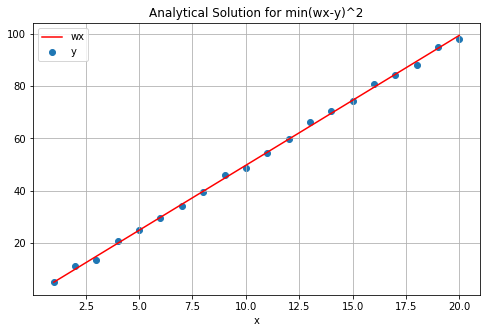

In [5]:
# let's plot
plot_lls_sol(x, y, w, "Analytical Solution for min(wx-y)^2")

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   LLS - Gradient Descent Solution
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow \frac{1}{N}\sum_{i=1}^N 2wx_i^2 -2x_iy_i$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

In [6]:
# lls - gradient descent solution
N = 20 # num samples
num_iterations = 20
alpha_k = 0.005
# we want to find w that minimizes (wx-y)^2
# initialize w
w = 0
for i in range(num_iterations):
    print("iter:", i, " w = ", w)
    gradient = np.sum(2 * w * np.square(x) - 2 * x * y) / N
    w = w - alpha_k * gradient
print("best w:", w)

iter: 0  w =  0
iter: 1  w =  7.1376096046222175
iter: 2  w =  4.032749426611554
iter: 3  w =  5.383363604046192
iter: 4  w =  4.795846436862124
iter: 5  w =  5.051416404587194
iter: 6  w =  4.940243468626789
iter: 7  w =  4.988603695769565
iter: 8  w =  4.967566996962457
iter: 9  w =  4.9767179609435495
iter: 10  w =  4.972737291611774
iter: 11  w =  4.974468882771096
iter: 12  w =  4.973715640616791
iter: 13  w =  4.974043300953914
iter: 14  w =  4.973900768707265
iter: 15  w =  4.973962770234557
iter: 16  w =  4.973935799570186
iter: 17  w =  4.973947531809187
iter: 18  w =  4.973942428285222
iter: 19  w =  4.973944648318146
best w: 4.973943682603824


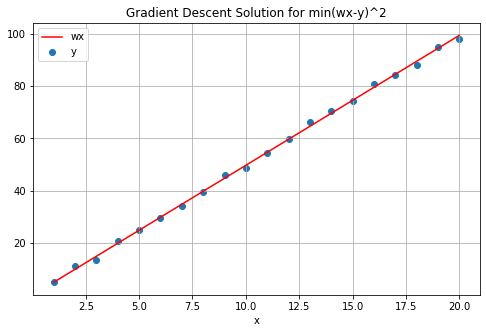

In [7]:
plot_lls_sol(x, y, w, "Gradient Descent Solution for min(wx-y)^2")

* **Least Squares Visualization**:
<img src="./assets/tut_06_lls_anim.gif">

### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:50px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
---
* The main problem with (Batch) GD is that it uses the **whole** training set to compute the gradients. But what if that training set is huge? Computing the gradient can take a very long time.
* *Stochastic* Gradient Descent on the other hand, samples just one instance randomly at every step and computes the gradients based on that single instance. This makes the algorithm much faster but due to its randomness, it is much less stable. Instead of steady decreasing untill reaching the minimum, the cost function will bounce up and down, **decreasing only on average**. With time, it will get *very close* to the minimum, but once it is there it will continue to bounce around!
* The final parameters are good but **not optimal**.

* When the cost function is very irregular, this bouncing can actually help the algorithm escape local minima, so SGD has better chance to find the *global* minimum.
* How to find optimal parameters using SGD?
    * **Reduce the learning rate gradually**: this is called *learning schedule*
        * But don't reduce too quickly or you will get stuck at a local minimum or even frozen!
* *Mini-Batch* Gradient Descent - same idea as SGD, but instead of one instance each step, $m$ samples.
    * Get a little bit closer to the minimum than SGD but a little harder to escape local minima.

* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\{x_1,...,x_m,\}$ with corresponding targets $\{y_1,...,y_m\}$
        * Compute gradient: $g \leftarrow \frac{1}{m} \sum_{i=1}^m f'(x_i,w)$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

<img src="./assets/tut_06_sgd.png" style="height:250px">

<a href="https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3">Image Source</a>

In [8]:
def batch_generator(x, y, batch_size, shuffle=True):
    """
    This function generates batches for a given dataset x.
    """
    N = len(x)
    num_batches = N // batch_size
    batch_x = []
    batch_y = []
    if shuffle:
        # shuffle
        rand_gen = np.random.RandomState(0)
        shuffled_indices = rand_gen.permutation(np.arange(len(x)))
        x = x[shuffled_indices]
        y = y[shuffled_indices]
    for i in range(N):
        batch_x.append(x[i])
        batch_y.append(y[i])
        if len(batch_x) == batch_size:
            yield np.array(batch_x), np.array(batch_y)
            batch_x = []
            batch_y = []
    if batch_x:
        yield np.array(batch_x), np.array(batch_y)

In [9]:
# mini-batch gradient descent
batch_size = 5
num_batches = N // batch_size
print("total batches:", num_batches)
num_iterations = 20
alpha_k = 0.001
batch_gen = batch_generator(x, y, batch_size, shuffle=True)
# we want to find w that minimizes (wx-y)^2
# initialize w
w = 0
for i in range(num_iterations):
    for batch_i, batch in enumerate(batch_gen):
        batch_x, batch_y = batch
        if batch_i % 5 == 0:
            print("iter:", i, "batch:", batch_i, " w = ", w)
        gradient = np.sum(2 * w * np.square(batch_x) - 2 * batch_x * batch_y) / len(batch_x)
        w = w - alpha_k * gradient
    batch_gen = batch_generator(x, y, batch_size, shuffle=True)
print("best w:", w)

total batches: 4
iter: 0 batch: 0  w =  0
iter: 1 batch: 0  w =  3.714921791540526
iter: 2 batch: 0  w =  4.660336847464463
iter: 3 batch: 0  w =  4.900936698046245
iter: 4 batch: 0  w =  4.962167252538953
iter: 5 batch: 0  w =  4.9777498923220564
iter: 6 batch: 0  w =  4.981715537654223
iter: 7 batch: 0  w =  4.982724759655079
iter: 8 batch: 0  w =  4.982981597814244
iter: 9 batch: 0  w =  4.983046960876035
iter: 10 batch: 0  w =  4.983063595202728
iter: 11 batch: 0  w =  4.983067828493167
iter: 12 batch: 0  w =  4.983068905828502
iter: 13 batch: 0  w =  4.983069180000908
iter: 14 batch: 0  w =  4.983069249775384
iter: 15 batch: 0  w =  4.983069267532377
iter: 16 batch: 0  w =  4.9830692720513765
iter: 17 batch: 0  w =  4.983069273201423
iter: 18 batch: 0  w =  4.983069273494099
iter: 19 batch: 0  w =  4.983069273568582
best w: 4.983069273587538


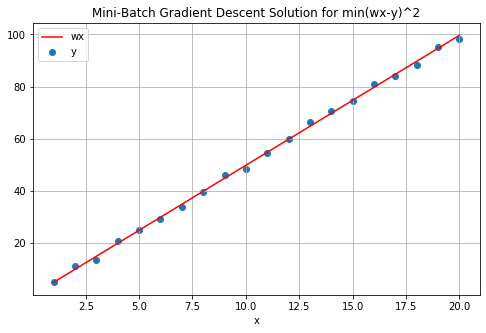

In [10]:
# let's plot
plot_lls_sol(x, y, w, "Mini-Batch Gradient Descent Solution for min(wx-y)^2")

#### GD Comparison Summary
---

| Method|Accuracy | Update Speed | Memory Usage |Online Learning |
|---|---|---|---|---|
| **Batch** Gradient Descent | Good | Slow |  High | No |
| **Stochastic** Gradient Descent |  Good (with softening) | Fast |  Low |  Yes |
| **Mini-Batch** Gradient Descent | Good | Medium | Medium | Yes (depends on the MB size) |


* **"Online"** - samples arrive while the algorithm runs (that is, when the algorithm starts running, not all samples exist)
* Note: All of the Gradient Descent algorithms require **scaling** if the feaures are not within the same range!


#### Challenges
---
* Choosing a **learning rate**
    * Defining **learning schedule**
* Working with features of different scales (e.g. heights (cm), weights (kg) and age (scalar))
* Avoiding **local minima** (or *suboptimal* minima)

## <img src="https://img.icons8.com/dusk/64/000000/math.png" style="height:50px;display:inline"> Mathematical Background
---
### <img src="https://img.icons8.com/dusk/64/000000/point-objects.png" style="height:50px;display:inline"> Multivariate Calculus
---
* **The Derivative** - the derivative of $f: \mathbb{R} \rightarrow \mathbb{R}$ is a *function* $f': \mathbb{R} \rightarrow \mathbb{R}$ given by:
$$ f'(x) = \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x+h) - f(x)}{h}$$
    * Illustration: <img src="./assets/tut_06_deriv.jpg" style="height:200px">
    

* Rewrite the above: $$ \lim_{h \to 0} \frac{f(x+h) - f(x) -f'(x) \cdot h}{h}=0$$
    * <img src="./assets/tut_06_deriv_2.jpg" style="height:200px">

* **The Gradient** - the gradient of  $f: \mathbb{R}^N \rightarrow \mathbb{R}$ is a *function* $\nabla f: \mathbb{R}^N \rightarrow \mathbb{R}^N$ given by: $$ \lim_{h \to 0} \frac{||f(\overline{x}+\overline{h}) - f(\overline{x}) -\nabla f(\overline{x}) \cdot \overline{h}||}{||\overline{h}||} = 0$$
    * <br><img src="./assets/tut_06_gradient.gif" style="height:200px">

* The gradient can be expressed in terms of the function's **partial derivatives**: $$\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix} $$
    * Illustration: <img src="./assets/tut_06_gradient_2.jpg" style="height:200px">

* **The Hessian Matrix**
    * Definition: $H(f)(x)_{i,j} = \frac{\partial^2}{\partial x_i \partial x_j} f(x)$
    * $$ \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_1 \partial x_n}  \\ \frac{\partial^2 f}{\partial x_2 x_1} & \frac{\partial^2 f}{\partial x_2^2} & \cdots & \frac{\partial^2 f}{\partial x_2 \partial x_n}  \\ \vdots  & \vdots  & \ddots & \vdots  \\ \frac{\partial^2 f}{\partial x_n x_1} & \frac{\partial^2 f}{\partial x_n \partial x_2} & \cdots & \frac{\partial^2 f}{\partial x_n^2}  \end{bmatrix} $$

## <img src="https://img.icons8.com/dusk/64/000000/scissors.png" style="height:50px;display:inline"> Matrix Calculus -  Vector & Matrix Derivatives
---
* We will use most of the derivations "as is" without derivation.
* A good reference: **<a href="http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf">The Matrix Cookbook</a>**
* <img src="https://img.icons8.com/plasticine/100/000000/error.png" style="height:20px;display:inline"> **REMEMBER** - ALWAYS write the dimensions of each component and identify whether the expression is a **matrix, vector or scalar**!

### <img src="https://img.icons8.com/bubbles/100/000000/multiply.png" style="height:50px;display:inline"> Derivative of Vector Multiplication
---
* Let $x, a \in \mathbb{R}^N \rightarrow x, a$ are vectors
* $\frac{\partial x^Ta}{\partial x} = \frac{\partial a^Tx}{\partial x} = a$
    * $x^Ta = a^Tx$ are **scalars**
    * $a$ is a **vector**
    * Derivation: $$ f = x^Ta = [x_1, x_2, ..., x_n] \begin{bmatrix} a_{1} \\a_{2} \\ \vdots \\a_{n}\end{bmatrix}  = a_1 x_1 + a_2 x_2 + ... + a_n x_n = \sum_{i=1}^n a_i x_i$$ $$\frac{\partial x^Ta}{\partial x} = \begin{bmatrix}\frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix} = \begin{bmatrix} a_{1} \\ a_{2} \\ \vdots \\ a_{n} \end{bmatrix} = a $$

#### <img src="https://img.icons8.com/cotton/64/000000/bunch-of-keys-1.png" style="height:30px;display:inline"> Common Derivations
---
* $\nabla_x Ax = A^{T}$
* $\nabla_x x^{T} A x = (A + A^{T}) x$ 
    * If $W$ is **symetric**:
        * $\frac{\partial}{\partial s} (x-As)^T W (x-As) = -2A^TW(x-As)$
        * $\frac{\partial}{\partial x} (x-As)^T W (x-As) = 2W(x-As)$
* $\frac{\partial}{\partial A} \ln |A| = A^{-T}$
* $\frac{\partial}{\partial A} Tr[AB] = B^{T}$

### <img src="https://img.icons8.com/dusk/64/000000/link.png" style="height:50px;display:inline"> The Chain Rule
---
* Let $$ f(x) = h(g(x))$$ $$x \in \mathbb{R}^n $$ $$ f, g : \mathbb{R}^n \rightarrow \mathbb{R}$$ $$ h: \mathbb{R} \rightarrow \mathbb{R}$$
* $ \nabla f = h' \cdot \nabla g$

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise 1 - The Chain Rule
---
Find the gradient of $f(x) = \sqrt{x^TQx}$ ($Q$ is positive definite)

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 1
---
* $g(x) = x^TQx \rightarrow \nabla g = (Q + Q^T) x = 2Qx$
* $h(z) = \sqrt{z} \rightarrow h'(z) = \frac{1}{2\sqrt{z}}$
* $\nabla f =\frac{1}{2\sqrt{x^TQx}}2Qx = \frac{Qx}{\sqrt{x^TQx}} $

## <img src="https://img.icons8.com/nolan/64/000000/3d-scale.png" style="height:50px;display:inline">  Multi-Dimensional Optimization
---
### <img src="https://img.icons8.com/dusk/64/000000/copyleft.png" style="height:50px;display:inline"> Optimality Conditions
---
* If $f$ has *local* optimum at $x_0$ then $\nabla f(x_0) = 0$
* If the **Hessian** is:
    * **Positive Definite** (all eigenvalues *positive*) at $x_0 \rightarrow$ *local minimum*
    * **Negative Definite** (all eigenvalues *negative*) at $x_0 \rightarrow$ *local maximum*
    * Both **positive and negative** eigenvalues at $x_0 \rightarrow$ *saddle* point
    * <img src="./assets/tut_06_saddle.jpg" style="height:100px">

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - (Multivariate) Linear Least Squares
---
* **Problem Formulation**
    * $y \in \mathbb{R}^N$ - vector of values
    * $X \in \mathbb{R}^{N \times L}$ - data matrix with $N$ examples and *$L$ features*
    * $w \in \mathbb{R}^L$ - the *parameters* to be learnt, a **weight for each feature**
* **Goal**: find $w$ that best fits the measurement y, that is, find a *weighted linear combination* of the feature vector to best fit the measurment $y$
* Mathematiacally, the problem is:
$$\min_w f(w;x,y) = \min_w \sum_{i=1}^N||x_i w-y_i||^2 $$
* In vector form:
$$\min_w f(w;x,y) = \min_w ||Xw - Y||^2 $$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline">   (Multivariate) LLS - Analytical Solution
---
* Mathematically:
$$\min_w f(w;x,y) = \min_w ||Xw - Y||^2 = \min_w (Xw-Y)^T(Xw-Y)= \min_w (w^TX^TXw -2w^TX^TY + Y^TY)$$
* The derivative: 
$$\nabla_w f(w;x,y) = (X^TX + X^TX)w -2X^TY = 0 \rightarrow w=(X^TX)^{-1}X^TY $$ $$X^TX \in \mathbb{R}^{L \times L} $$

In [11]:
# let's load the cancer dataset
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
# reminder, the data looks like this
dataset.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
187,874373,B,11.71,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.03239,...,21.39,84.42,521.5,0.1323,0.1040,0.1521,0.10990,0.2572,0.07097,NaN
323,895100,M,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,...,31.86,171.10,1938.0,0.1592,0.4492,0.5344,0.26850,0.5558,0.10240,NaN
355,9010258,B,12.56,19.07,81.92,485.8,0.08760,0.10380,0.10300,0.04391,...,22.43,89.02,547.4,0.1096,0.2002,0.2388,0.09265,0.2121,0.07188,NaN
82,8611555,M,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.33390,0.18450,...,33.62,211.70,2562.0,0.1573,0.6076,0.6476,0.28670,0.2355,0.10510,NaN
329,895633,M,16.26,21.88,107.50,826.8,0.11650,0.12830,0.17990,0.07981,...,25.21,113.70,975.2,0.1426,0.2116,0.3344,0.10470,0.2736,0.07953,NaN
80,861103,B,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,...,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851,NaN
530,91858,B,11.75,17.56,75.89,422.9,0.10730,0.09713,0.05282,0.04440,...,27.98,88.52,552.3,0.1349,0.1854,0.1366,0.10100,0.2478,0.07757,NaN
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,...,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN
48,857155,B,12.05,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,...,20.70,89.88,582.6,0.1494,0.2156,0.3050,0.06548,0.2747,0.08301,NaN


In [32]:
def plot_3d(x, y, z):
    %matplotlib notebook
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z)
    ax.set_xlabel('Radius Mean')
    ax.set_ylabel('Area Mean')
    ax.set_zlabel('Perimeter Mean')
    ax.set_title("Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean")

<IPython.core.display.Javascript object>


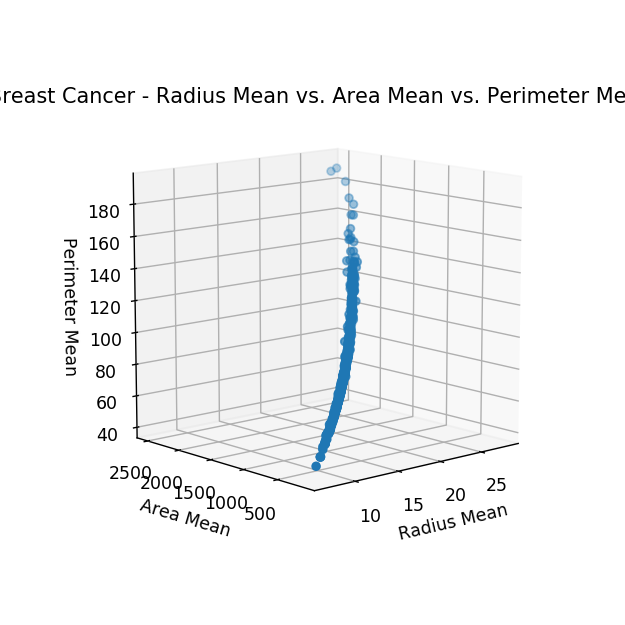

In [33]:
# let's plot X = [radius, area], y = perimeter
xs = dataset[['radius_mean']].values
ys = dataset[['area_mean']].values
zs = dataset[['perimeter_mean']].values
plot_3d(xs, ys, zs)

In [34]:
def plot_3d_lls(x, y, z, lls_sol, title=""):
    # plot
    %matplotlib notebook
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, label='Y')
    ax.scatter(x, y, lls_sol, label='Xw')
    ax.legend()
    ax.set_xlabel('Radius Mean')
    ax.set_ylabel('Area Mean')
    ax.set_zlabel('Perimeter Mean')
    ax.set_title(title)

In [35]:
# multivariate lls - analytical solution
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
xs = dataset[['radius_mean']].values
ys = dataset[['area_mean']].values
zs = dataset[['perimeter_mean']].values
w = np.linalg.inv(X.T @ X) @ X.T @ Y
lls_sol = X @ w
print("w:")
print(w)

w:
[[6.19721311]
 [0.00676913]]


<IPython.core.display.Javascript object>


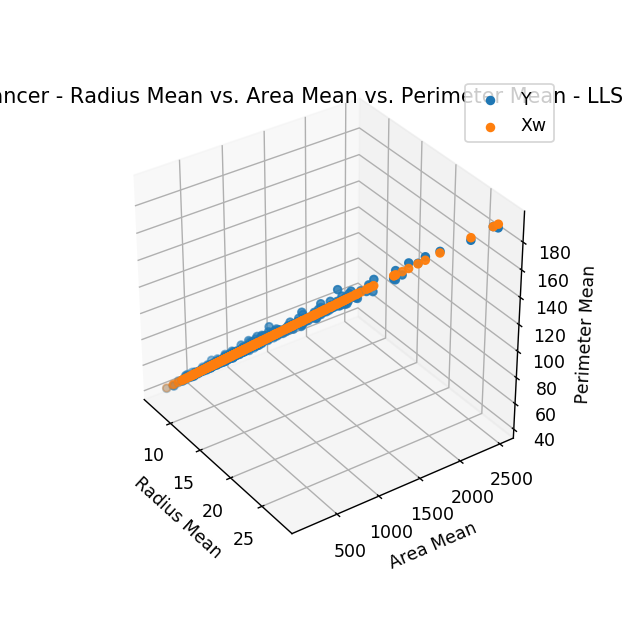

In [36]:
# plot
plot_3d_lls(xs, ys, zs, lls_sol, "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Analyitical")

## What If L is Very Large???
If $L = 1000$, we would need to invert a $1000 \times 1000$ matrix, which would take about $10^9$ operations!

### <img src="https://img.icons8.com/dusk/64/000000/treasure-map.png" style="height:50px;display:inline">(Batch) Gradient Descent
---
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter vector $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow \nabla f(x,w)$ 
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

* For **Linear Least Squares**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter vector $w$
    * **While** stopping criterion not met **do**
        * Compute gradient: $g \leftarrow 2X^TXw - 2X^Ty$ 
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

In [ ]:
# multivariate lls - gradient descent solution
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
# Scaling
X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
Y = (Y - Y.mean(axis=0, keepdims=True)) / Y.std(axis=0, keepdims=True)
num_iterations = 20
alpha_k = 0.0001
L = X.shape[1]
# initialize w
w = np.zeros((L, 1))
for i in range(num_iterations):
    print("iter:", i, " w = ")
    print(w)
    gradient = 2 * X.T @ X @ w - 2 * X.T @ Y
    w = w - alpha_k * gradient
lls_sol = X @ w
print("w:")
print(w)

<IPython.core.display.Javascript object>


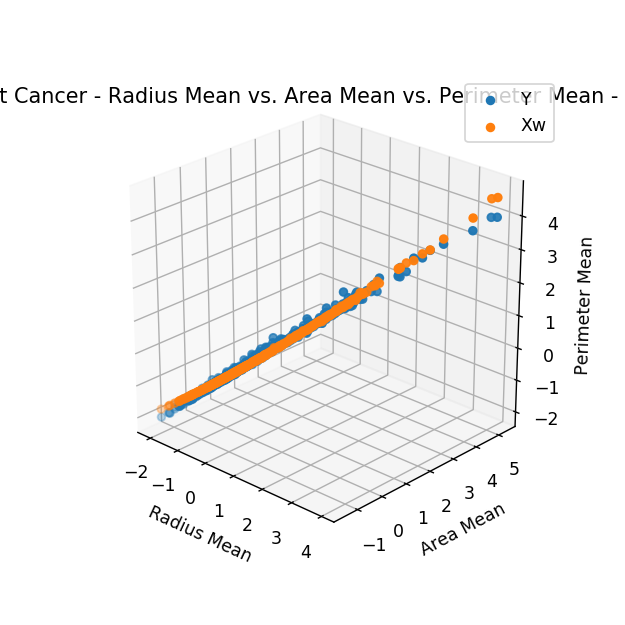

In [38]:
# plot
plot_3d_lls(X[:,0], X[:, 1], Y, lls_sol, "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS GD")

### <img src="https://img.icons8.com/dusk/64/000000/waypoint-map.png" style="height:50px;display:inline">Stochastic Gradient Descent (Mini-Batch Gradient Descent)
---
* **Pseudocode**:
    * **Require**: Learning rate $\alpha_k$
    * **Require**: Initial parameter $w$
    * **While** stopping criterion not met **do**
        * Sample a minibatch of $m$ examples from the training set ($m=1$ for SGD)
        * Set $\tilde{X} = [x_1,...,x_m] $ with corresponding targets $\tilde{Y} = [y_1,...,y_m]$
        * Compute gradient: $g \leftarrow 2\tilde{X}^T\tilde{X} - 2\tilde{X}^T \tilde{Y}$
        * Apply update: $w \leftarrow w - \alpha_k g$
        * $k \leftarrow k + 1$
    * **end while**

In [19]:
def batch_generator(x, y, batch_size, shuffle=True):
    """
    This function generates batches for a given dataset x.
    """
    N, L = x.shape
    num_batches = N // batch_size
    batch_x = []
    batch_y = []
    if shuffle:
        # shuffle
        rand_gen = np.random.RandomState(0)
        shuffled_indices = rand_gen.permutation(np.arange(N))
        x = x[shuffled_indices, :]
        y = y[shuffled_indices, :]
    for i in range(N):
        batch_x.append(x[i, :])
        batch_y.append(y[i, :])
        if len(batch_x) == batch_size:
            yield np.array(batch_x).reshape(batch_size, L), np.array(batch_y).reshape(batch_size, 1)
            batch_x = []
            batch_y = []
    if batch_x:
        yield np.array(batch_x).reshape(-1, L), np.array(batch_y).reshape(-1, 1)

In [29]:
# multivaraite mini-batch gradient descent
X = dataset[['radius_mean', 'area_mean']].values
Y = dataset[['perimeter_mean']].values
# Scaling
X = (X - X.mean(axis=0, keepdims=True)) / X.std(axis=0, keepdims=True)
Y = (Y - Y.mean(axis=0, keepdims=True)) / Y.std(axis=0, keepdims=True)
N = X.shape[0]
batch_size = 10
num_batches = N // batch_size
print("total batches:", num_batches)

total batches: 56


In [ ]:
num_iterations = 10
alpha_k = 0.001
batch_gen = batch_generator(X, Y, batch_size, shuffle=True)
# initialize w
w = np.zeros((L, 1))
for i in range(num_iterations):
    for batch_i, batch in enumerate(batch_gen):
        batch_x, batch_y = batch
        if batch_i % 50 == 0:
            print("iter:", i, "batch:", batch_i, " w = ")
            print(w)
        gradient = 2 * batch_x.T @ batch_x @ w - 2 * batch_x.T @ batch_y
        w = w - alpha_k * gradient
    batch_gen = batch_generator(X, Y, batch_size, shuffle=True)

lls_sol = X @ w

<IPython.core.display.Javascript object>


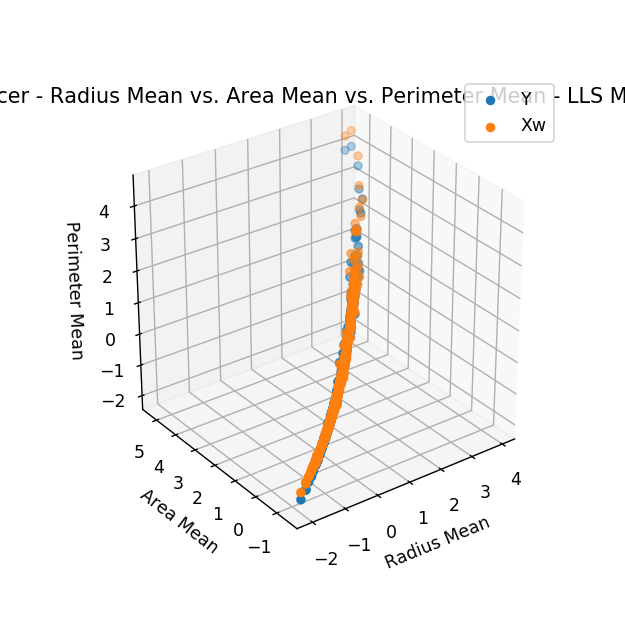

w:
[[0.55894282]
 [0.42792729]]


In [31]:
# plot
plot_3d_lls(X[:,0], X[:, 1], Y, lls_sol, "Breast Cancer - Radius Mean vs. Area Mean vs. Perimeter Mean - LLS Mini-Batch GD")
print("w:")
print(w)

## <img src="https://img.icons8.com/office/80/000000/conflict.png" style="height:50px;display:inline"> Constrained Optimization
---
### <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Largrange Multipliers
---
* A method for optimization with **equality constraints**
* The general case: $$ \min f(x,y) $$ $$ \textit{s.t. (subject to)}: g(x,y)=0 $$
* The *Lagrange* function (*Lagrangian*) is defined by: $$ \mathcal{L}(x,y,\lambda) = f(x,y) -\lambda \cdot g(x,y) $$

* Geometric Intuition: let's look at the following figure where we wish to **maximize** $f(x,y)$ s.t $g(x,y)=0$ - <br>
<img src="./assets/tut_06_lagrange.jpg" style="height:400px"> <br>

* To maximize $f(x,y)$ subject to $g(x,y)=0$ is to find the largest value $c \in \{7,8,9,10,11\}$ such that the level curve (contour) $f(x,y) = c$ intersects with $g(x,y)=0$
* It happens when the curves just touch each other
    * When they have a common tangent line
* Otherwise, the value of $c$ should be increased

* Since the gradient of a function is **perperndicular** to the contour lines:
    * The *contour lines* of $f$ and $g$ are **parallel** iff the *gradients* of $f$ and $g$ are **parallel**
    * Thus, we want points $(x,y)$ where $g(x,y) = 0$ and $$\nabla_{x,y}f(x,y)=\lambda \nabla_{x,y} g(x,y) $$
        * $\lambda$ - "The Lagrange Multiplier" is required to adjust the **magnitudes** of the (parallel) gradient vectors.

###  <img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"><img src="https://img.icons8.com/dusk/64/000000/lambda.png" style="height:30px;display:inline"> Multiple Constraints
---
* Extenstion of the above for problems with **multiple constraints** using a similar argument
* The general case: minimize $f(x)$ s.t. $g_i(x)=0$, $i = 1,2,..., m$ 
* The **Lagrangian** is a weighted sum of objective and constraint functions: $$ \mathcal{L}(x, \lambda_1, ..., \lambda_m) = f(x) - \sum_{i=1}^m \lambda_i g_i(x)$$
    * $\lambda_i$ is the Lagrange multipler associated with $g_i(x) = 0$

* The **solution** is obtained by solving the (unconstrained) optimization problem: $$\nabla_{x, \lambda_1, ..., \lambda_m}\mathcal{L}(x, \lambda_1, ..., \lambda_m) = 0 \iff \begin{cases}
    \nabla_x \big[f(x) - \sum_{i=1}^m \lambda_ig_i(x) = 0 \big]\\
    g_1(x) = ... = g_m(x) = 0
  \end{cases}$$
  * Amounts to solving $d + m$ equations in $d+m$ unknowns
      * $d = |x|$ is the dimension of $x$

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise 2 - Max Entropy Distribution
---
Maximize $H(P) = -\sum_{i=1}^d p_i \log p_i$ subject to $\sum_{i=1}^d p_i = 1$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution 2
---
* The Lagrangian is: $$L(P,\lambda) = -\sum_{i=1}^d p_i \log p_i -\lambda \big(\sum_{i=1}^dp_i -1 \big) $$
* Find stationary point for $L$:
    * $\forall i$, $\frac{\partial L(P,\lambda)}{\partial p_i} = -\log p_i -1 -\lambda =0 \rightarrow p_i = e^{-\lambda - 1}$
    * $\frac{\partial L(P,\lambda)}{\partial \lambda} = -\sum_{i=1}^d p_i + 1 = 0 \rightarrow \sum_{i=1}^d e^{-\lambda - 1} = 1 \rightarrow e^{-\lambda - 1} = \frac{1}{d} = p_i$
    * The Max Entropy distribution is the **uniform distribution**

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* Gradient Descent - <a href="https://www.youtube.com/watch?v=sDv4f4s2SB8">Gradient Descent, Step-by-Step</a>
    * <a href="https://www.youtube.com/watch?v=jc2IthslyzM">Mathematics of Gradient Descent - Intelligence and Learning</a>
* Stochastic Gradient Descent - <a href="https://www.youtube.com/watch?v=vMh0zPT0tLI">Stochastic Gradient Descent, Clearly Explained</a>
* Constrained Optimization - <a href="https://www.youtube.com/watch?v=nUfYR5FBGZc">Constrained Optimization with LaGrange Multipliers</a>
* Lagrange Multipliers - <a href="https://www.youtube.com/watch?v=8mjcnxGMwFo">Lagrange Multipliers | Geometric Meaning & Full Example</a>

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/